In [1]:
from core.data.models import Models
from core.data.models_dict_v2 import model_dict
from core.data.generate_synthetic_df import generate_synthetic_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

#### Recurrence equation 


$CLV(s,t) = \sum_{s'}^{S} \gamma P(s'|s)[Profit(s',t) + CLV_0(s',t)]\quad t=1,\dots, T; s=1,\dots, k$


- $P(s'|s)$: Transition matrix (simulation)

- $Profit(s',t)$

- $CLV_0(s',t)$: Initial value (random)

- $\gamma = 0.5$

In [2]:
# Create synthetic dataframe over time
def data_over_time(n=100, k=8):
    seed = np.random.randint(1000)
    df = generate_synthetic_df(n, seed)
    # Instantiate an object from the class "Models"
    models = Models(model_dict)
    # Calculate the cost and price
    cost = models.calculate_cost(df)
    pricing = models.calculate_pricing(df)
    # Calculate the profit on the synthetic dataframe
    df["profit"] = models.calculate_profit(cost, pricing)
    df["class"] = list(np.random.randint(k, size=n)+1)
    return(df)

In [3]:
T = 1000
n=100
k=8
PROFIT = np.zeros([T,n])
STATES = np.zeros([T,n])
for i in range(T):
    DATA = data_over_time(n=100, k=8)
    PROFIT[i,:] = DATA["profit"]
    STATES[i,:] = DATA["class"]

In [4]:
DATA

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,class
0,12524,35,2,13932,False,False,Not_Single,0,0,-37.114442,7
1,18135,51,0,14694,False,False,Not_Single,1,0,-13.686342,1
2,8563,33,2,19516,False,False,Not_Single,0,0,-48.969331,2
3,19354,22,4,16666,False,False,Single,0,0,-131.237934,4
4,12415,53,2,100,False,False,Not_Single,0,0,27.911297,4
...,...,...,...,...,...,...,...,...,...,...,...
95,8536,15,9,16380,False,False,Single,0,0,-117.490710,1
96,27744,93,10,3182,False,False,Not_Single,0,0,131.180617,6
97,3443,53,11,15898,False,False,Not_Single,0,0,40.744591,4
98,17334,29,5,6734,False,False,Single,1,0,-122.669892,1


In [5]:
profit = pd.DataFrame(PROFIT)
states = pd.DataFrame(STATES)

$Profit(t,n)$

In [6]:
profit

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,39.821059,35.950375,-34.210954,69.977609,-4.913230,-80.179232,88.201800,-83.282084,-19.902792,20.025897,...,59.504159,75.214678,4.551206,34.298576,-2.672943,52.986136,-63.727784,21.657773,56.988769,-65.900504
1,-46.707293,1.836483,27.308279,-123.131916,28.959357,35.878472,-5.478769,-43.710123,26.320491,64.041934,...,-150.536703,-106.349883,-45.055628,17.739530,174.258410,83.982318,-133.731398,50.940119,121.199499,91.658120
2,73.004356,44.685321,-93.594518,-22.095259,-1.709599,-3.788782,-31.793412,68.971649,135.405856,-43.750374,...,-16.248597,44.620861,17.361485,75.159693,-57.979762,-37.106133,3.000936,95.852142,-31.548921,-23.624012
3,112.205308,40.674263,3.059276,32.785460,-11.887291,2.381574,7.683500,-52.985816,-9.181715,71.188663,...,-24.566056,-35.284768,92.643790,-72.122563,-27.992952,71.793255,-43.556172,33.045530,49.513317,-12.304328
4,-50.421039,13.448108,19.353524,-75.393944,-80.484182,102.626497,-37.272842,-31.727450,-47.182618,-62.144697,...,35.455262,53.232248,30.710228,4.521043,129.023331,-20.156102,-56.049682,83.515448,65.650410,77.676835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,80.207820,-1.231477,0.433010,-10.943900,11.898302,1.106446,-35.618929,-5.075963,19.379216,-42.130984,...,68.070678,107.748952,-22.780038,41.820011,55.422623,3.668692,23.365748,-34.469908,-63.118228,25.816802
996,-30.702137,54.012949,65.125771,17.867557,-1.742601,-206.828835,-32.873484,40.531581,18.123169,106.113384,...,27.688975,-44.356514,6.737878,3.499354,6.330020,-76.832732,-202.480837,22.893243,79.977576,-82.048773
997,-87.770826,84.539178,68.023532,-13.259155,-59.864980,83.002177,4.270175,-51.460633,2.724706,-57.804728,...,30.973937,43.426074,-51.890434,80.612568,-46.217475,104.980229,19.378263,14.060616,7.306274,-21.166169
998,-100.020818,-62.427985,-15.946008,-60.830781,-153.844276,-44.088514,-3.148976,-36.421905,68.582787,60.763003,...,-71.005177,94.315884,42.292847,6.168157,-104.381198,28.950163,29.121635,-119.339108,-115.401568,-17.032435


#### Assuming random states, but it can be improved by the solution of Problem 1, the methodology is agnostic the clustering/classification model.

In [7]:
states = states.astype('int')
states

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5,8,5,8,8,1,1,7,4,1,...,2,8,5,6,8,4,8,7,4,4
1,1,7,4,2,5,4,5,2,8,2,...,4,3,4,7,8,3,5,8,5,1
2,7,3,6,7,4,1,7,1,7,6,...,1,7,4,6,1,5,5,3,2,8
3,6,7,3,3,2,7,7,2,1,4,...,6,5,6,6,1,5,1,2,5,4
4,2,7,4,4,6,1,4,6,3,1,...,2,1,7,5,2,3,1,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,6,3,8,6,8,2,5,7,1,...,3,2,3,6,3,4,6,4,7,6
996,6,7,1,1,4,6,4,2,1,3,...,6,2,6,8,1,5,2,2,8,2
997,6,5,3,7,2,1,2,1,6,3,...,8,3,5,8,1,4,7,4,5,3
998,2,3,6,7,1,3,7,5,1,4,...,5,8,8,7,7,5,3,1,6,6


In [8]:
state_current = states.iloc[:-1,:]
state_next = states.iloc[1:,:]
STATE_CURRENT = state_current.values.ravel()
STATE_NEXT = state_next.values.ravel()
P = matrix = pd.crosstab(
    pd.Series(STATE_CURRENT, name='from'),
    pd.Series(STATE_NEXT, name='to'),
    normalize=0)

In [9]:
P

to,1,2,3,4,5,6,7,8
from,,,,,,,,
1,0.104103,0.175532,0.118963,0.091101,0.134076,0.116430,0.106467,0.153327
2,0.133138,0.124296,0.136490,0.109534,0.115382,0.113456,0.142195,0.125508
3,0.120862,0.112394,0.169207,0.136182,0.135797,0.106774,0.114550,0.104234
4,0.120584,0.124276,0.148779,0.105731,0.130905,0.118402,0.132919,0.118402
5,0.121148,0.153595,0.116827,0.106310,0.105658,0.129545,0.125306,0.141611
6,0.112872,0.158715,0.126091,0.137192,0.105754,0.131006,0.109059,0.119312
7,0.121967,0.136349,0.107263,0.123252,0.114575,0.123654,0.141250,0.131689
8,0.112027,0.143106,0.114485,0.143661,0.139856,0.107350,0.121621,0.117894


In [10]:
PROFIT = np.zeros([T,k])
for i in range(T):
    PROFIT[i,0] = profit.loc[i,states.iloc[i,:]==1].mean()
    PROFIT[i,1] = profit.loc[i,states.iloc[i,:]==2].mean()
    PROFIT[i,2] = profit.loc[i,states.iloc[i,:]==3].mean()
    PROFIT[i,3] = profit.loc[i,states.iloc[i,:]==4].mean()
    PROFIT[i,4] = profit.loc[i,states.iloc[i,:]==5].mean()
    PROFIT[i,5] = profit.loc[i,states.iloc[i,:]==6].mean()
    PROFIT[i,6] = profit.loc[i,states.iloc[i,:]==7].mean()
    PROFIT[i,7] = profit.loc[i,states.iloc[i,:]==8].mean()
PROFIT = pd.DataFrame(PROFIT)

In [11]:
PROFIT

,0,1,2,3,4,5,6,7
0,4.184481,-24.673252,-3.471221,19.763879,9.853564,1.111400,-5.830310,5.938095
1,0.917789,-1.579284,11.562267,0.650724,3.297385,26.360467,18.486811,21.832521
2,34.018448,22.413182,-15.746528,-13.261564,3.581501,0.020767,26.317014,-13.594422
3,-15.518754,-2.414650,0.708537,16.518321,-0.767649,9.569425,7.207218,-29.046829
4,19.626882,-10.979669,-0.736953,13.753754,8.996614,-16.063410,7.543642,36.405678
...,...,...,...,...,...,...,...,...
995,13.127032,-6.051459,19.671981,12.414048,-25.228542,1.921718,13.001623,7.283918
996,14.201386,-4.788881,18.372774,3.236601,-4.233498,-0.909078,49.068517,-10.823657
997,24.944273,-7.021127,-42.294161,15.817192,24.108314,-20.346804,-13.304424,46.937599
998,-20.730488,-19.749251,-25.318252,10.405174,-10.522825,6.798479,-30.864530,29.681944


#### Initial value condition of $CLV_0 = 0$

In [12]:
CLV_0 = pd.DataFrame(np.zeros([T,k]))

In [13]:
CLV_0

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
gamma = 0.85

$CLV(s,t) = \sum_{s'}^{S} \gamma P(s'|s)[Profit(s',t) + CLV(s',t)]$

In [15]:
CLV = pd.DataFrame(gamma*P.values@(PROFIT.T.values+CLV_0.T.values)).T

<AxesSubplot:>

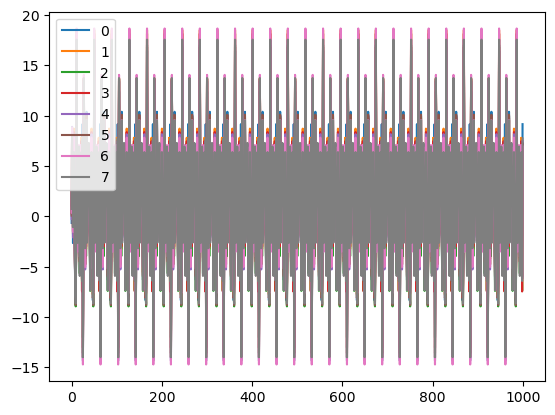

In [16]:
CLV.plot()

In [17]:
MAE = mae(CLV,CLV_0)
print(MAE)

4.910270555876613


In [18]:
error = 0.001
kk = 0
while(MAE>error):
    print(kk)
    CLV_0 = CLV
    CLV = pd.DataFrame(gamma*P.values@(PROFIT.T.values+CLV_0.T.values)).T
    MAE = mae(CLV,CLV_0)
    kk+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


<AxesSubplot:>

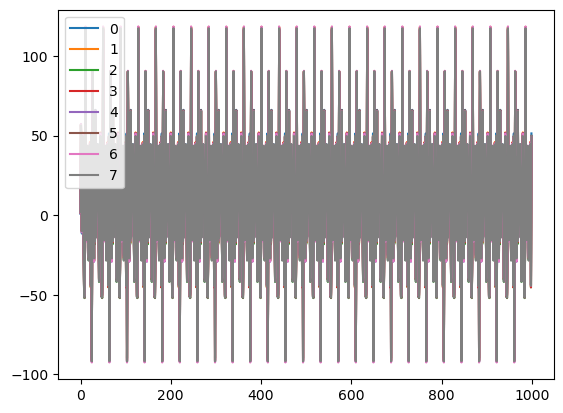

In [19]:
CLV.plot()

### **Observation**: The dynamic is artficial

- Depends on the initial distribution of CLV, 

- The realization sequences of the profits: may be more meaningful with real data

- and the syntetic transition matrix